## State Schema: Dataclass Example

This notebook demonstrates different state schema approaches in LangGraph: **dataclasses** and **Pydantic models**. Dataclasses provide type hints but don't enforce validation at runtime, while Pydantic provides runtime validation.


## Define Dataclass State


In [3]:
from dataclasses import dataclass
from typing import Literal
@dataclass
class DataclassState:
    name: str
    mood: Literal["happy","sad"]

## Define Dataclass State


## Note: Accessing dataclass attributes


To access the keys of a dataclass, we just need to modify the subscripting used in node_1:

We use state.name for the dataclass state rather than state["name"] for the TypedDict

## Note: Invoking with dataclass


## Build graph with Dataclass state


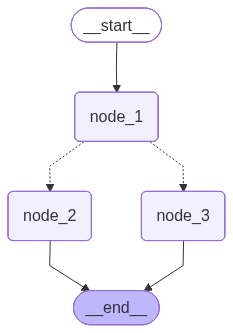

In [6]:
def node_1(state):
    print("---Node 1---")
    return {"name": state.name + " is ... "}

# Build graph
builder = StateGraph(DataclassState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

We invoke with a dataclass to set the initial values of each key / channel in our state!

## Pydantic Section


## Invoke graph with Dataclass


## Note: Dataclass limitation


In [8]:
graph.invoke(DataclassState(name="Lance",mood="sad"))

---Node 1---
---Node 2---


{'name': 'Lance is ... ', 'mood': 'happy'}

Pydantic

## Create invalid dataclass instance


## Demonstrate Dataclass limitation


## Note: Pydantic validation


As mentioned, TypedDict and dataclasses provide type hints but they don't enforce types at runtime.

This means you could potentially assign invalid values without raising an error!

For example, we can set mood to mad even though our type hint specifies mood: list[Literal["happy","sad"]].

## Test Pydantic validation


## Define Pydantic State with validation


In [9]:
dataclass_instance = DataclassState(name="Lance", mood="mad")

## Build graph with Pydantic state


## Build graph with Pydantic state


## Invoke graph with valid Pydantic state


Pydantic can perform validation to check whether data conforms to the specified types and constraints at runtime.

## Test validation with invalid value


## Invoke graph with valid Pydantic state


In [10]:
from pydantic import BaseModel, field_validator, ValidationError

class PydanticState(BaseModel):
    name: str
    mood: str # "happy" or "sad" 

    @field_validator('mood')
    @classmethod
    def validate_mood(cls, value):
        # Ensure the mood is either "happy" or "sad"
        if value not in ["happy", "sad"]:
            raise ValueError("Each mood must be either 'happy' or 'sad'")
        return value

try:
    state = PydanticState(name="John Doe", mood="mad")
except ValidationError as e:
    print("Validation Error:", e)

Validation Error: 1 validation error for PydanticState
mood
  Value error, Each mood must be either 'happy' or 'sad' [type=value_error, input_value='mad', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/value_error


## Demonstrate Pydantic validation error


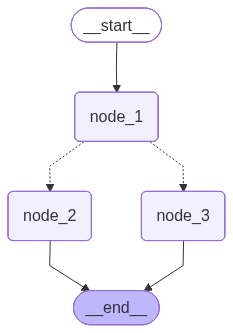

In [11]:
# Build graph
builder = StateGraph(PydanticState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke(PydanticState(name="Lance",mood="sad"))

---Node 1---
---Node 2---


{'name': 'Lance is ... ', 'mood': 'happy'}

In [ ]:
graph.invoke(PydanticState(name="Lance",mood="Mad"))

ValidationError: 1 validation error for PydanticState
mood
  Value error, Each mood must be either 'happy' or 'sad' [type=value_error, input_value='Mad', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/value_error